<a href="https://colab.research.google.com/github/Harsh-0-7/Kaggle-Competitions/blob/master/Exploratory_Analysis_of_Geolocational_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install kaggle
!pip install -q kaggle 

In [2]:
#To upload kaggle.json file from local system
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshhiteshshah","key":"f440ed8d6c77219d1373613b4fd3d6eb"}'}

In [3]:
#create directory
!mkdir ~/.kaggle

In [4]:
#copy json file to kaggle folder
!cp kaggle.json ~/.kaggle/

In [5]:
#Change premission of json file to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# To list all dataset in kaggle
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-09-09 20:40:01          11895  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7230  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2838  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2850  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [11]:
#Downloading Required Dataset from kaggle
! kaggle datasets download -d borapajo/food-choices

  0% 0.00/5.25M [00:00<?, ?B/s]
100% 5.25M/5.25M [00:00<00:00, 48.5MB/s]


In [13]:
#Unzipping .zip file
!unzip food-choices.zip

Archive:  food-choices.zip
  inflating: codebook_food.docx      
  inflating: food_coded.csv          


In [24]:
import pandas as pd
import numpy as np
full_dataset=pd.read_csv("food_coded.csv");
print(full_dataset.head())
print(full_dataset.info())
#print(full_dataset.describe())

     GPA  Gender  ...  waffle_calories                    weight
0    2.4       2  ...             1315                       187
1  3.654       1  ...              900                       155
2    3.3       1  ...              900  I'm not answering this. 
3    3.2       1  ...             1315             Not sure, 240
4    3.5       1  ...              760                       190

[5 rows x 61 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffe

In [25]:
relevent=full_dataset[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']]
missing_values_count = relevent.isnull().sum()
print(missing_values_count)
# how many total missing values do we have?
total_cells = np.product(relevent.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)



cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64
2.109090909090909


In [26]:
#As percent missing is less than 5%,we are dropping rows containing missing values.
relevent_with_no_na=relevent.dropna(axis=0)
print(relevent_with_no_na.shape[0])

100


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

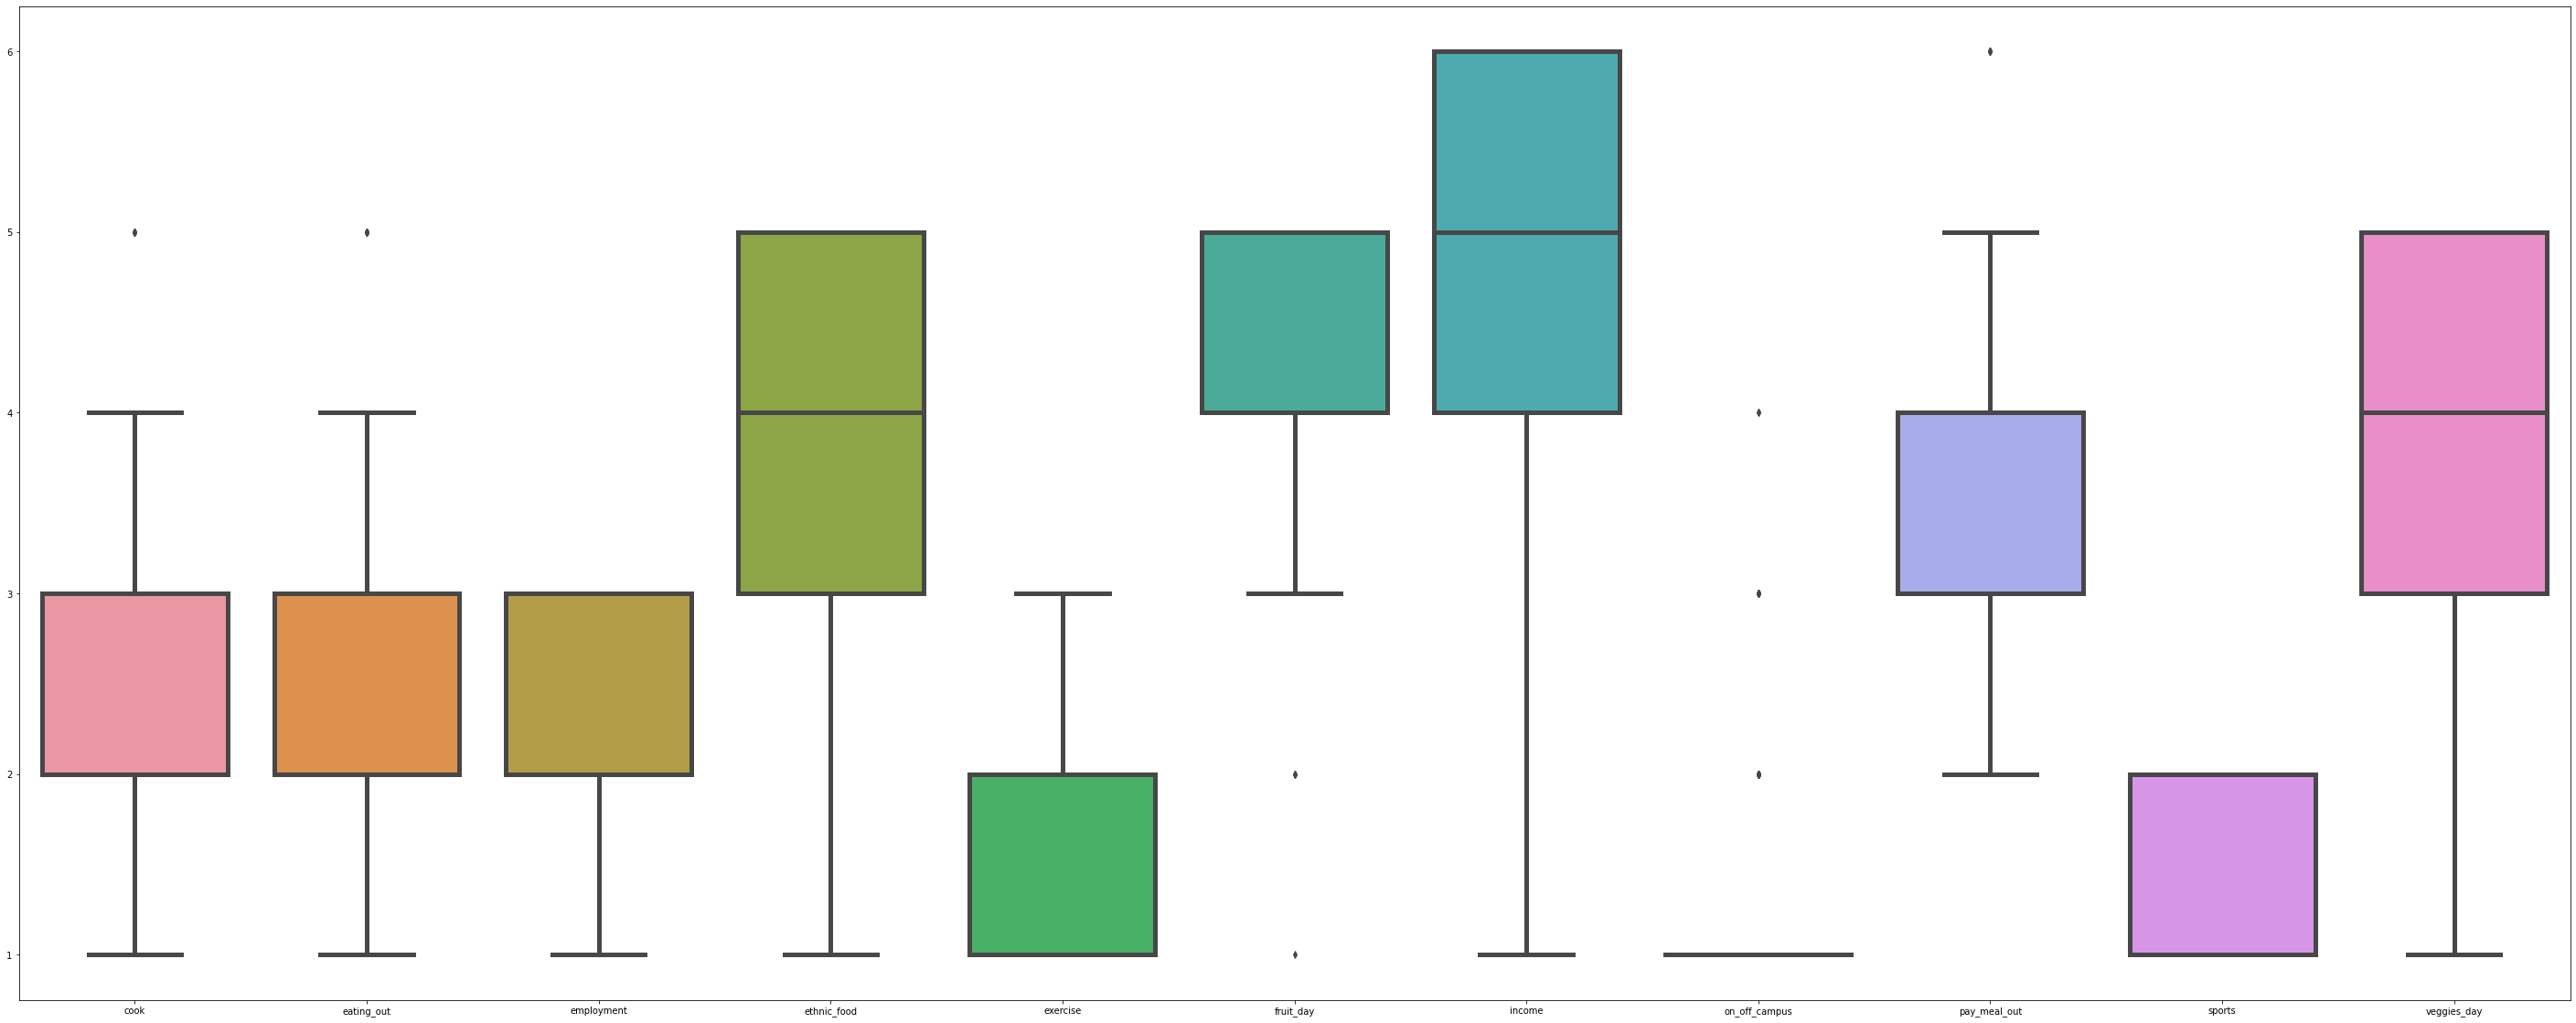

In [59]:
fig = plt.figure(figsize =(50, 20))
 
# Creating plot
ax=sns.boxplot(data=relevent_with_no_na,linewidth=5)

# show plot
plt.show()

In [61]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(relevent_with_no_na)
print(y_kmeans5)

kmeans5.cluster_centers_

[4 3 3 3 3 2 3 0 3 1 3 3 3 3 2 1 0 4 4 0 0 3 4 2 0 2 3 3 1 2 0 4 3 3 3 0 3
 1 3 3 3 1 3 3 4 3 4 3 3 2 4 3 1 4 3 3 4 1 3 3 4 1 3 2 2 3 3 2 2 3 4 3 0 1
 0 2 2 3 3 2 0 0 1 3 3 3 0 4 2 2 3 4 2 0 1 1 1 1 1 4]


array([[3.92307692, 2.38461538, 2.53846154, 2.92307692, 1.15384615,
        4.53846154, 5.84615385, 1.30769231, 4.61538462, 1.07692308,
        3.76923077],
       [2.6       , 2.2       , 2.2       , 4.13333333, 1.66666667,
        4.8       , 2.46666667, 1.8       , 3.06666667, 1.6       ,
        4.86666667],
       [2.625     , 2.625     , 2.375     , 2.8125    , 1.9375    ,
        2.9375    , 3.875     , 1.4375    , 3.625     , 1.5       ,
        2.3125    ],
       [2.6097561 , 2.34146341, 2.53658537, 4.56097561, 1.58536585,
        4.56097561, 5.14634146, 1.2195122 , 3.34146341, 1.24390244,
        4.43902439],
       [2.46666667, 3.33333333, 2.46666667, 2.33333333, 1.6       ,
        4.        , 5.33333333, 1.26666667, 2.86666667, 1.46666667,
        3.8       ]])

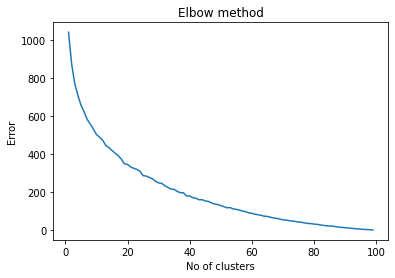

In [65]:
Error =[]
for i in range(1, 100):
    kmeans = KMeans(n_clusters = i).fit(relevent_with_no_na)
    kmeans.fit(relevent_with_no_na)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 100), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [67]:
kmeans25 = KMeans(n_clusters=25)
y_kmeans25 = kmeans25.fit_predict(relevent_with_no_na)
print(y_kmeans25)


[ 9 13  7  8 13 22  7  4  7  2  7  1  3  7 23 12  4 24 15  0  0  1  0  0
  4  8  3  1 20  1 16  9  3  8 13  6 13  2 10  1 13 12  3 10 21  3  9 10
  3  1  6  3  2  8  3  4  9 11 10  7  6 20 13 14 14 13 13  1  5  7  8  7
 16 11 16  8 17  1 13  8  4 19 11  7  7 13 16  8  5 18  3  8  5  0 11 20
 11 20  5  6]


In [68]:
kmeans25.cluster_centers_

array([[3.6       , 1.6       , 2.2       , 2.4       , 1.        ,
        3.8       , 5.8       , 1.        , 4.4       , 1.        ,
        2.6       ],
       [3.5       , 2.125     , 2.375     , 4.25      , 2.5       ,
        3.375     , 4.125     , 1.5       , 2.875     , 1.5       ,
        3.625     ],
       [1.33333333, 3.        , 1.66666667, 4.33333333, 1.        ,
        5.        , 2.66666667, 1.66666667, 2.33333333, 1.33333333,
        5.        ],
       [2.66666667, 4.        , 2.66666667, 4.88888889, 1.33333333,
        5.        , 5.55555556, 1.22222222, 3.33333333, 1.22222222,
        4.55555556],
       [3.2       , 1.8       , 2.6       , 3.2       , 1.2       ,
        4.6       , 5.6       , 1.        , 5.2       , 1.2       ,
        4.6       ],
       [3.        , 3.25      , 3.        , 4.        , 1.75      ,
        3.75      , 3.        , 1.25      , 4.5       , 1.25      ,
        3.        ],
       [3.        , 4.75      , 2.5       , 2.5       , 1.

In [75]:
#plt.scatter(relevent_with_no_na[:,0],relevent_with_no_na[:,0],c=kmeans25,color='rainbow')